# Startup Investments 

This project explores the use of machine learning models in the startup investment process. Classification models are used to distinguish between potential sucsessful startups from unsucsessful ones. The dataset used was acquired from Kaggle (imported from crunchbase) and contains information about the startups, founders and investors in the space. The information is divided into 11 different tables; the information deemed of value was extracted from 4 shortlisted tables and merged together into one main dataframe.
First the dataset was explored and analysed using some visualisations for a deeper understanding, and then it was prepared for the ML models. Finally the models were created and compared to one another.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [10]:
funding_roundsdf = pd.read_csv('funding_rounds.csv')
degreesdf = pd.read_csv('degrees.csv')
relationshipsdf = pd.read_csv('relationships.csv')
objectsdf = pd.read_csv('objects.csv')

FileNotFoundError: [Errno 2] File funding_rounds.csv does not exist: 'funding_rounds.csv'

In [ ]:
objectsdf.head()

In [ ]:
objectsdf.shape

In [ ]:
objectsdf.dtypes

In [ ]:
#Drop features not considered important
objectsdf = objectsdf.drop(['parent_id', 'name', 'permalink', 'domain', 'homepage_url', 'logo_url', 'logo_width', 
                           'logo_height', 'short_description', 'overview', 'first_investment_at', 'last_investment_at', 
                            'investment_rounds','invested_companies', 'created_by', 'created_at', 'updated_at'], axis=1)

In [ ]:
#Keep information relating only to the companies
objectsdf = objectsdf[objectsdf.entity_type == 'Company']

In [ ]:
objectsdf

In [ ]:
objectsdf.shape

In [ ]:
relationshipsdf.head()

In [ ]:
relationshipsdf.shape

In [ ]:
relationshipsdf.dtypes

In [ ]:
#Drop unimportant features
relationshipsdf = relationshipsdf.drop(['id','relationship_id','start_at','end_at','sequence',
                                        'created_at','updated_at'], axis=1)

In [ ]:
#Keep relationships that are only current
relationshipsdf = relationshipsdf[relationshipsdf.is_past == 0]

In [ ]:
#Keep information only relating to the Founder, Co-founder or CEO
relationshipsdf=relationshipsdf[(relationshipsdf['title'] == 'Founder') | (relationshipsdf['title'] == 'CEO')
                                | (relationshipsdf['title'] == 'Co-founder') ]


In [ ]:
relationshipsdf=relationshipsdf.drop('is_past', axis=1)

In [ ]:
relationshipsdf.head()

In [ ]:
degreesdf.head()

In [ ]:
degreesdf.shape

In [ ]:
degreesdf.dtypes

In [ ]:
#Drop unimportant features
degreesdf=degreesdf.drop(['id','created_at','updated_at'], axis=1)

In [ ]:
degreesdf

In [ ]:
#Renaming column names
relationshipsdf.rename(columns = {'person_object_id':'object_id'}, inplace = True) 

In [ ]:
#Merging relationshipdf and degreedf
rel_deg_df=pd.merge(relationshipsdf,degreesdf, on='object_id')

In [ ]:
rel_deg_df

In [ ]:
rel_deg_df.describe()

In [ ]:
#Getting rid of duplicates
rel_deg_df = rel_deg_df.drop_duplicates(subset='relationship_object_id', keep='first')
rel_deg_df

In [ ]:
rel_deg_df.describe()

In [ ]:
#Renaming column and merging objectdf with rel_deg_df
rel_deg_df.rename(columns = {'relationship_object_id':'id'}, inplace = True) 
startupdf=pd.merge(objectsdf,rel_deg_df, on='id', how='left')

In [ ]:
startupdf

In [ ]:
funding_roundsdf.head()

In [ ]:
funding_roundsdf["funding_round_code"].value_counts()

In [ ]:
#Adding the following features for the different funding rounds and returning the amount raised in each

funding_roundsdf['angel'] = np.where(funding_roundsdf.funding_round_code == 'angel', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['seed'] = np.where(funding_roundsdf.funding_round_code == 'seed', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_a'] = np.where(funding_roundsdf.funding_round_code == 'a', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_b'] = np.where(funding_roundsdf.funding_round_code == 'b', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_c'] = np.where(funding_roundsdf.funding_round_code == 'c', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_d'] = np.where(funding_roundsdf.funding_round_code == 'd', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_e'] = np.where(funding_roundsdf.funding_round_code == 'e', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_f'] = np.where(funding_roundsdf.funding_round_code == 'f', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['series_g'] = np.where(funding_roundsdf.funding_round_code == 'g', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['debt_round'] = np.where(funding_roundsdf.funding_round_code == 'debt_round', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['grant'] = np.where(funding_roundsdf.funding_round_code == 'grant', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['private_equity'] = np.where(funding_roundsdf.funding_round_code == 'private_equity', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['convertible'] = np.where(funding_roundsdf.funding_round_code == 'convertible', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['crowd'] = np.where(funding_roundsdf.funding_round_code == 'crowd', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['post_ipo_equity'] = np.where(funding_roundsdf.funding_round_code == 'post_ipo_equity', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['secondary_market'] = np.where(funding_roundsdf.funding_round_code == 'secondary_market', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['post_ipo_debt'] = np.where(funding_roundsdf.funding_round_code == 'post_ipo_debt', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['crowd_equity'] = np.where(funding_roundsdf.funding_round_code == 'crowd_equity', funding_roundsdf.raised_amount_usd, 0 )
funding_roundsdf['unattributed'] = np.where(funding_roundsdf.funding_round_code == 'unattributed', funding_roundsdf.raised_amount_usd, 0 )



In [ ]:
funding_roundsdf

In [ ]:
funding_roundsdf.columns

In [ ]:
#Dropping features
funding_roundsdf = funding_roundsdf.drop(['id', 'funding_round_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      axis=1)

In [ ]:
#Renaming column and merging with startupdf
funding_roundsdf.rename(columns = {'object_id':'id'}, inplace = True) 
startupdf=pd.merge(startupdf,funding_roundsdf, on='id', how='left')

In [ ]:
startupdf.head()

In [ ]:
aggregation_functions = {'entity_type': 'first','entity_id': 'first','normalized_name': 'first','category_code': 'first',
                         'status': 'first','founded_at': 'first','closed_at': 'first','twitter_username': 'first',
                         'description': 'first','tag_list': 'first','country_code': 'first','state_code': 'first',
                         'city': 'first','region': 'first','first_funding_at': 'first','last_funding_at': 'first',
                         'funding_rounds': 'first','funding_total_usd': 'first','first_milestone_at': 'first',
                         'last_milestone_at': 'first','milestones': 'first','relationships': 'first','object_id': 'first',
                         'title': 'first','degree_type': 'first','subject': 'first','institution': 'first','graduated_at': 'first',
                         'angel': 'sum','seed': 'sum','grant': 'sum','crowd_equity': 'sum','series_a': 'sum', 
                         'series_b': 'sum', 'series_c': 'sum','series_d': 'sum','series_e': 'sum',
                         'series_f': 'sum','series_g': 'sum',
                         'debt_round': 'sum','private_equity': 'sum','convertible': 'sum','crowd': 'sum',
                         'post_ipo_equity': 'sum','secondary_market': 'sum', 'post_ipo_debt' : 'sum',
                         'unattributed': 'sum'}
startupnewdf = startupdf.groupby(startupdf['id']).aggregate(aggregation_functions)

In [ ]:
startupnewdf

In [ ]:
startupnewdf.founded_at.value_counts()

In [ ]:
#Feature showing whether a company has a twitter account or not
startupnewdf["twitter_account"] = startupnewdf.twitter_username.isnull().map({True: 0, False: 1})

In [ ]:
#Adding feature status_cat made from the categories that make up feature status 
#0=acquired 3=operating 1=closed 2=ipo
startupnewdf["status"] = startupnewdf["status"].astype('category')
startupnewdf["satus_cat"] = startupnewdf["status"].cat.codes

In [ ]:
startupnewdf.dtypes

In [ ]:
#change to datetime
for feature in ['founded_at','closed_at', 'first_funding_at', 'last_funding_at', 
                'first_milestone_at','last_milestone_at', 'graduated_at',]:
    startupnewdf[feature] = pd.to_datetime(startupnewdf[feature])

In [ ]:
#Showing the difference in months between the company founding date and each feature description. 
#More useful as it shows the number in months since founding rather than displaying just the date.
for feature in ['closed_at', 'first_funding_at', 'last_funding_at', 
                'first_milestone_at','last_milestone_at', 'graduated_at',]:
    startupnewdf[feature] = ((startupnewdf[feature] - startupnewdf.founded_at)/np.timedelta64(1, 'M'))

In [ ]:
#Filling null values
for feature in ['closed_at', 'first_funding_at', 'last_funding_at', 
                'first_milestone_at','last_milestone_at', 'graduated_at',]:
    startupnewdf[feature] = startupnewdf[feature].fillna(0)

In [ ]:
#change to int
startupnewdf[feature] = startupnewdf[feature].astype(int)

In [ ]:
startupnewdf = startupnewdf[startupnewdf['founded_at'].notna()]


In [ ]:
#An arbitrary date in 2014 was chosen as the dataset relates to startups in 2013. 
#Choosing actual current date would distort the results as the dataset has not been updated. 

import datetime

currentdate = datetime.datetime(2014, 12, 31)
currentdate
 

In [ ]:
#Calculating startup age and adding it as a feature
startupnewdf['startup_age'] = ((currentdate - startupnewdf.founded_at)/np.timedelta64(1, 'Y'))
startupnewdf['startup_age'] = startupnewdf['startup_age'].astype(float)
startupnewdf['startup_age'] = startupnewdf.startup_age.round(2)

In [ ]:
#Creating the label for successful startup (1) and unsuccessful startup (0) based on conditions that meet our definition of successful

def conditions(s):
    if (s['satus_cat'] ==3 and s['series_b'] != 0) or (s['satus_cat'] ==3 and s['series_c'] != 0) or (s['satus_cat'] ==3 and s['series_d'] != 0) or (s['satus_cat'] ==3 and s['series_e'] != 0) or (s['satus_cat'] ==3 and s['series_f'] != 0) or (s['satus_cat'] ==3 and s['series_g'] != 0) or (s['satus_cat'] == 2) or (s['satus_cat'] ==0) :
        return 1
    else:
        return 0

In [ ]:
startupnewdf['labels'] = startupnewdf.apply(conditions, axis=1)

In [ ]:
startupnewdf

## Explanatory Data Analysis

In [ ]:
#Distribution of Successful vs Unsuccessful Startups
print(startupnewdf.labels.value_counts())
total = startupnewdf.labels.value_counts().sum()
print('Total=',total)

In [ ]:
ax = sns.countplot(y="labels", data=startupnewdf)
plt.title('Distribution of  Successful vs Unsuccessful Startups')
plt.xlabel('Number of startups')

total = len(startupnewdf['labels'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        

In [ ]:
startupnewdf['founded_at'].describe()

In [ ]:
#Oldest founded startups
startupnewdf['founded_at'].nsmallest(10)

In [ ]:
#Youngest founded startups
startupnewdf['founded_at'].nlargest(10)

In [ ]:
startupnewdf.nsmallest(10, 'founded_at')

In [ ]:
startupnewdf.nlargest(10, 'founded_at')

In [ ]:
#Startup age break-down in years
startupnewdf.startup_age.describe()

In [ ]:
#Startup Age Distribution in Years
plt.figure(figsize=(15,10))
sns.distplot(startupnewdf.startup_age)
plt.title('Startup Age Distribution in Years')
plt.show()

In [ ]:
#startup closed_at break-down in months
startupnewdf.closed_at[startupnewdf.closed_at>0].describe()

In [4]:
#startup closed_at distributions in months
plt.figure(figsize=(15,10))
sns.distplot(startupnewdf.closed_at[startupnewdf.closed_at>0])
plt.title('closed_at in months')
plt.show()


NameError: name 'startupnewdf' is not defined

<Figure size 1080x720 with 0 Axes>

In [ ]:
#startup founded year feature
startupnewdf['founded_year'] = pd.DatetimeIndex(startupnewdf['founded_at']).year
startupnewdf.head()

In [5]:
#Distribution of startup founded year 
plt.figure(figsize=(15,10))
sns.distplot(startupnewdf.founded_year[startupnewdf.founded_year])
plt.title('Startup Founded Year Distribution')
plt.show()

NameError: name 'startupnewdf' is not defined

<Figure size 1080x720 with 0 Axes>

In [6]:
#Distribution of startup founded year after the year 1980 (when the first technology companies emerged)
plt.figure(figsize=(15,10))
sns.distplot(startupnewdf.founded_year[startupnewdf.founded_year>1980])
plt.title('Startup Founding Year Distribution after 1980')
plt.show()

NameError: name 'startupnewdf' is not defined

<Figure size 1080x720 with 0 Axes>

In [7]:
# Info about the country code column
startupnewdf['country_code'].describe()

NameError: name 'startupnewdf' is not defined

In [247]:
# Number of rows containing the top 20 country codes
startupnewdf['country_code'].value_counts()[:20]

USA    38625
GBR     5365
IND     3105
CAN     2790
DEU     1457
FRA     1321
AUS     1076
ESP      912
ISR      838
NLD      688
IRL      522
SWE      500
CHN      498
ITA      491
BRA      474
FIN      428
CHE      396
SGP      392
RUS      372
JPN      352
Name: country_code, dtype: int64

In [248]:
#Startups founded after 2010
target1 = startupnewdf[(startupnewdf['founded_year'] >2010)]

In [249]:
#Top 20 country codes after 2010
target1['country_code'].value_counts()[:20]

USA    9338
GBR    1428
IND    1024
CAN     693
DEU     472
AUS     339
ESP     338
FRA     318
ISR     252
BRA     245
NLD     216
ITA     200
RUS     171
IRL     170
SGP     155
TUR     135
FIN     130
CHE     114
SWE     108
CHN      95
Name: country_code, dtype: int64

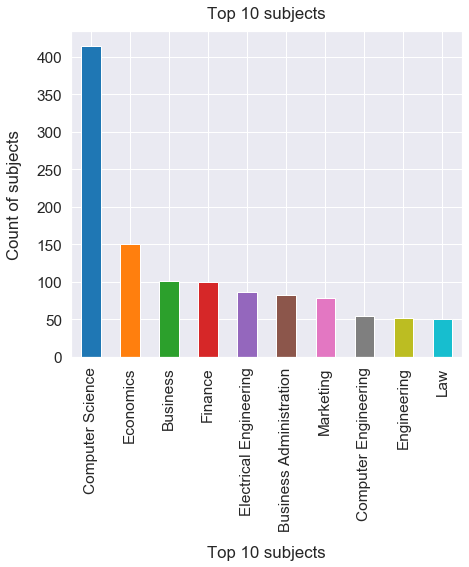

In [250]:
#Top 10 Subjects undertaken by startup Founders, Co-founders or CEOs
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
startupnewdf['subject'].value_counts()[:10].plot(kind='bar', figsize=(7, 6), color=colors)
plt.xlabel("Top 10 subjects", labelpad=14)
plt.ylabel("Count of subjects", labelpad=14)
plt.title("Top 10 subjects", y=1.02);

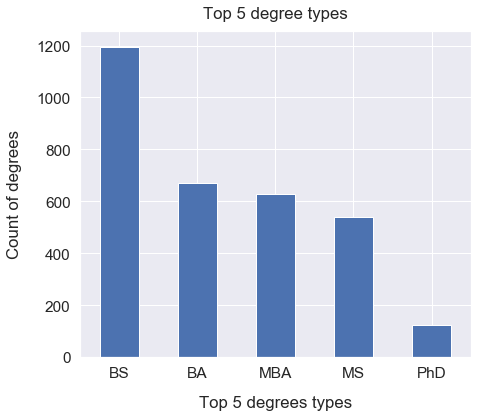

In [251]:
#Top 5 degree types undertaken by startup Founders, Co-founders or CEOs

sns.set(font_scale=1.4)
startupnewdf['degree_type'].value_counts()[:5].plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Top 5 degrees types", labelpad=14)
plt.ylabel("Count of degrees", labelpad=14)
plt.title("Top 5 degree types", y=1.02);

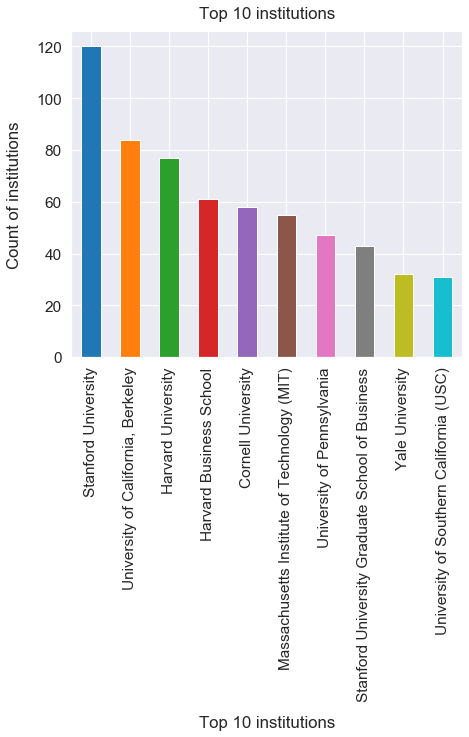

In [252]:
#Top 10 Institutions attended by startup Founders, Co-founders or CEOs

sns.set(font_scale=1.4)
startupnewdf['institution'].value_counts()[:10].plot(kind='bar', figsize=(7, 6),  color=colors)
plt.xlabel("Top 10 institutions", labelpad=14)
plt.ylabel("Count of institutions", labelpad=14)
plt.title("Top 10 institutions", y=1.02);

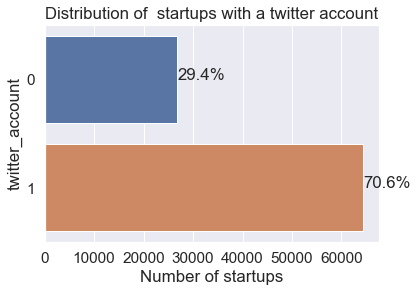

In [253]:
#Distribution of startups with a twitter account
ax = sns.countplot(y="twitter_account", data=startupnewdf)
plt.title('Distribution of  startups with a twitter account')
plt.xlabel('Number of startups')

total = len(startupnewdf['twitter_account'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        

## Startup status distribution

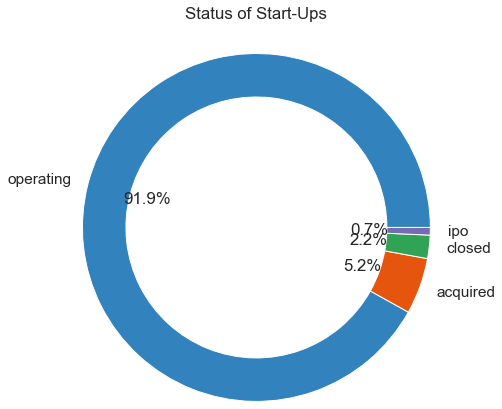

In [254]:
# Status of the startups
status=startupnewdf.status.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
plt.pie(status.values, radius=2,pctdistance =0.65, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Status of Start-Ups',pad=100)
plt.show()

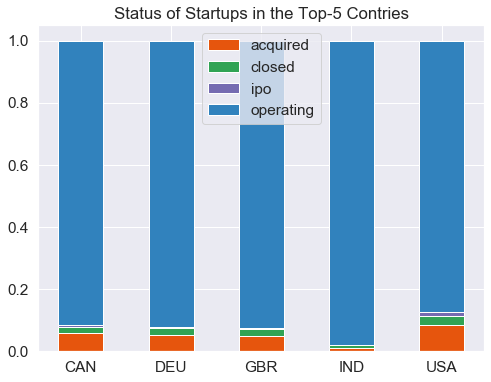

In [255]:
# Status of startups in top 5 countries
plt.figure(figsize=(8,6))
status_cont=startupnewdf.groupby('country_code')['status'].value_counts(normalize=True)
cont=['USA','GBR','IND','CAN', 'DEU']
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc['acquired'],color=outer_colors[1],label='acquired',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['closed'],bottom=status_cont.loc['acquired'],color=outer_colors[2],label='closed',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['ipo'],bottom=status_cont.loc['closed']+status_cont.loc['acquired'],color=outer_colors[3],label='ipo',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['operating'],bottom=status_cont.loc['ipo']+status_cont.loc['closed']+status_cont.loc['acquired'],color=outer_colors[0],label='operating',width=0.5,edgecolor='w')

plt.legend()
plt.title('Status of Startups in the Top-5 Contries')
plt.show()

## Market category 

In [256]:
# Top markets categories with number of occurances
market=startupnewdf.category_code.value_counts()
market=market[(market>1000)][0:10].to_frame()
market

,category_code
software,14451
web,12182
other,8119
ecommerce,7367
mobile,5143
advertising,4978
games_video,4794
consulting,3853
enterprise,3414
biotech,2637


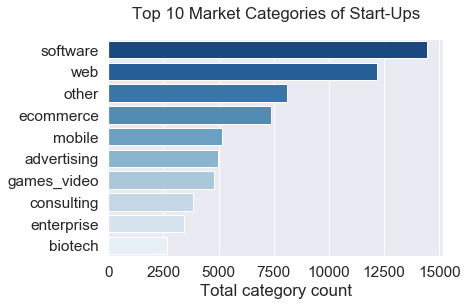

In [257]:
# Distribution of top 10 market categories 
plt.figure()
ax1=sns.barplot(y=market.index,x=market.category_code,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Categories of Start-Ups',pad=20)
ax1.set_xlabel('Total category count')
plt.show()

In [258]:
market_con=startupnewdf.groupby('country_code')['category_code'].value_counts().to_frame()


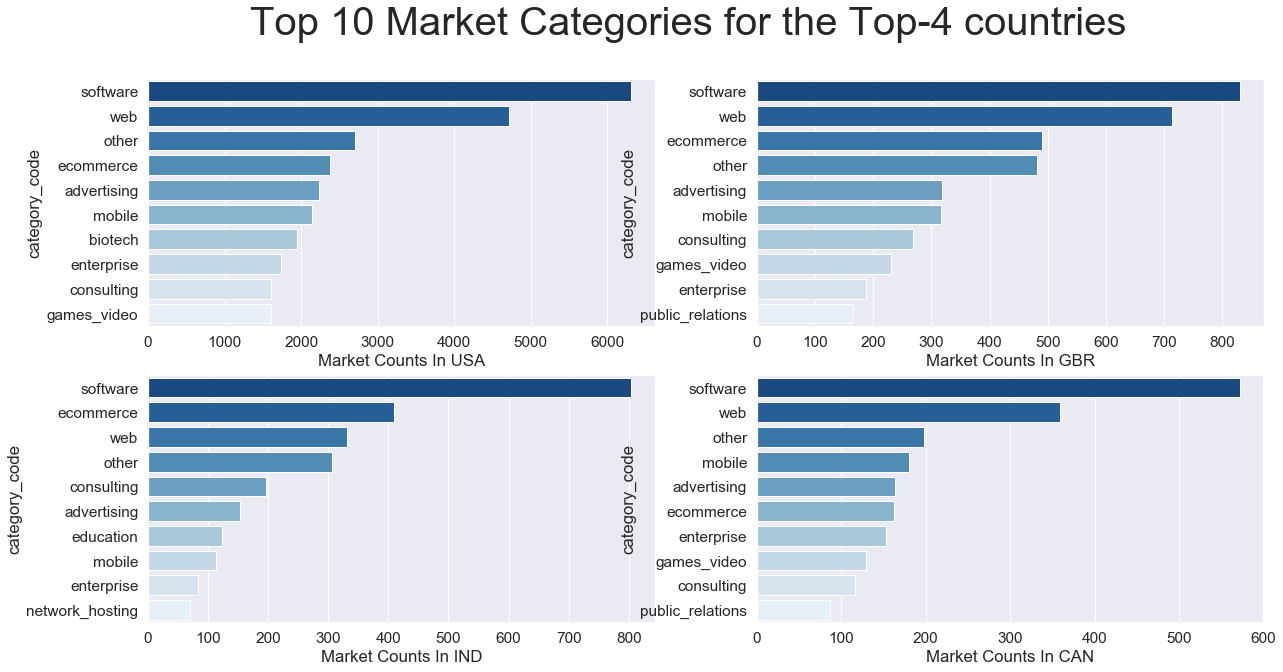

In [259]:
# Distribution of top 10 market categories in the top four countries
fig,axes=plt.subplots(2,2,figsize=(20,10))
cont=['USA','GBR','IND','CAN']
for con,ax in zip(cont,range(1,5)):
    ax=plt.subplot(2,2,ax)
    ax=sns.barplot(y=market_con.loc[con].index[0:10],x=market_con.loc[con].category_code[0:10],orient='h',palette='Blues_r')
    ax.set_xlabel('Market Counts In {}'.format(con))
plt.suptitle('Top 10 Market Categories for the Top-4 countries',size=40)
plt.show()

In [260]:
# Market categories where most start-ups closed
# Top markets that have 50+ startups in a specific market category were chosen to analyse

top_markets=(startupnewdf.category_code.value_counts()[startupnewdf.category_code.value_counts()>50]).index
sub_data=startupnewdf[startupnewdf.category_code.isin(top_markets)]

status_market_1=sub_data.groupby('category_code')['status'].value_counts(normalize=True).to_frame()
status_market_1.columns=['prop']
status_market_2=sub_data.groupby('category_code')['status'].value_counts().to_frame()
status_market_2.columns=['quantity']
status_market=pd.concat([status_market_1,status_market_2],axis=1)
status_market.reset_index()
status_market_closed=status_market.query('status=="closed"').reset_index(level=1)
status_market_closed.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Reds',subset=['prop']).set_caption('Market categories where most start-ups closed')

,status,prop,quantity
category_code,,,
messaging,closed,0.085106,20
semiconductor,closed,0.050710,25
social,closed,0.045596,44
web,closed,0.040387,492
photo_video,closed,0.039216,12
games_video,closed,0.034209,164
cleantech,closed,0.032759,38
sports,closed,0.028470,8
network_hosting,closed,0.028123,52


In [261]:
# Markets where the least number of start-ups closed
status_market_closed.sort_values(by='prop',ascending=True)[0:10].style.background_gradient(cmap='Greens_r',subset=['prop']).set_caption('Markets where the least number of start-ups closed')

,status,prop,quantity
category_code,,,
legal,closed,0.003597,2
health,closed,0.004614,4
education,closed,0.004757,9
consulting,closed,0.006748,26
manufacturing,closed,0.008043,3
transportation,closed,0.009569,2
real_estate,closed,0.009646,3
other,closed,0.010716,87
design,closed,0.010929,2


In [262]:
# Market categories where the most number of start-ups were acquired
status_market_acquired=status_market.query('status=="acquired"').reset_index(level=1)
status_market_acquired.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Blues',subset=['prop']).set_caption('Market categories where the most number of start-ups were acquired')

,status,prop,quantity
category_code,,,
semiconductor,acquired,0.215010,106
security,acquired,0.101754,87
biotech,acquired,0.094805,250
messaging,acquired,0.080851,19
enterprise,acquired,0.078207,267
network_hosting,acquired,0.069767,129
software,acquired,0.068577,991
mobile,acquired,0.057748,297
hardware,acquired,0.056402,111


# Funding distribution

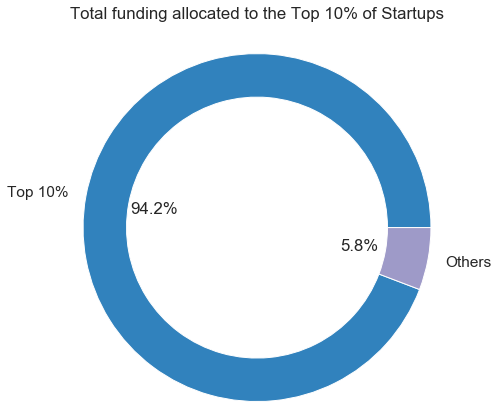

In [263]:
# Total proportion of funding allocated to the top 10% of startups.
top_fund=(startupnewdf.funding_total_usd.sort_values(ascending=False)[1:(int(startupnewdf.shape[0]*0.1))].sum())/(startupnewdf.funding_total_usd.sort_values(ascending=False).sum())

plt.figure()
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*13)
plt.pie([top_fund,1-top_fund], radius=2, colors=outer_colors,labels=['Top 10%','Others'],autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Total funding allocated to the Top 10% of Startups',pad=100)
plt.show()

In [264]:
# Total funding (top 10 startups)
startupnewdf.sort_values(ascending=False,by='funding_total_usd')[['normalized_name','funding_total_usd']][0:10]\
.style.hide_index().background_gradient(subset = 'funding_total_usd',cmap='Blues')

normalized_name,funding_total_usd
clearwire,5700000000.000000
sigmacare,2600000000.000000
facebook,2425700000.000000
carestream,2400000000.000000
solyndra,1765504319.000000
fisker automotive,1451000000.000000
o3b networks,1270283000.000000
twitter,1160166511.000000
groupon,1147288416.000000
xerox,1100000000.000000


In [265]:
#Status vs funding round break-down
startupnewdf.groupby('status')['funding_rounds'].describe().style.highlight_max(subset=['count', 'max','75%','50%','std','mean'],color='lightgreen')

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4767.000000,0.843927,1.299301,0.000000,0.000000,0.000000,1.000000,12.000000
closed,1975.000000,1.123038,0.959964,0.000000,1.000000,1.000000,1.000000,8.000000
ipo,642.000000,1.409657,2.200291,0.000000,0.000000,0.000000,2.000000,13.000000
operating,83843.000000,0.429970,0.982721,0.000000,0.000000,0.000000,0.000000,15.000000


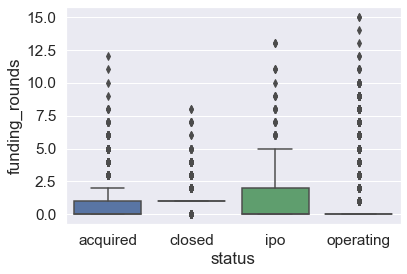

In [266]:
#status vs funding round 
sns.boxplot(data=startupnewdf,x='status',y='funding_rounds')

In [92]:
category_list=startupnewdf.tag_list.str.split(',').to_list()
categ=[]

for i in category_list:
    if isinstance(i,list):
        categ=categ+i
categ=list(filter(None,categ))

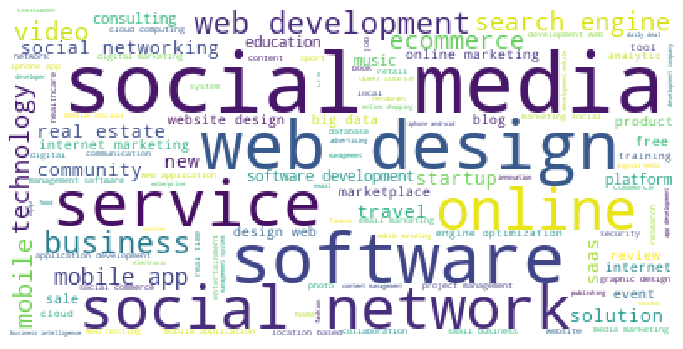

In [93]:
# Make a word cloud using the words in the startup tag list column
import wordcloud
categ=' '.join(categ)
w=wordcloud.WordCloud(background_color='White')
fig = plt.figure(figsize=(12, 8))
w.generate(categ)
plt.axis('off')
plt.imshow(w)

In [59]:
startupnewdf.head()

,entity_type,entity_id,normalized_name,category_code,status,founded_at,closed_at,twitter_username,description,tag_list,...,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,satus_cat,startup_age,labels,founded_year
id,,,,,,,,,,,,,,,,,,,,,
c:1,Company,1,wetpaint,web,operating,2005-10-17,0.0,BachelrWetpaint,Technology Platform Company,"wiki, seattle, elowitz, media-industry, media-...",...,0.0,0.0,0.0,0.0,0.0,1,3,9.20,1,2005
c:10000,Company,10000,mywebbo,network_hosting,operating,2008-07-26,0.0,NaN,NaN,"social-network, new, website, web, friends, ch...",...,0.0,0.0,0.0,0.0,0.0,0,3,6.43,0,2008
c:10001,Company,10001,the movie streamer,games_video,operating,2008-07-26,0.0,NaN,NaN,"watch, full-length, moives, online, for, free,...",...,0.0,0.0,0.0,0.0,0.0,0,3,6.43,0,2008
c:10002,Company,10002,synergie media,advertising,operating,2007-06-27,0.0,NaN,NaN,"social-media, web-design, web-development, out...",...,0.0,0.0,0.0,0.0,0.0,0,3,7.51,0,2007
c:10003,Company,10003,green basti ecosystems,cleantech,operating,2008-08-20,0.0,NaN,NaN,"cleantech, alternative-energy, biogas, carbon-...",...,0.0,0.0,0.0,0.0,0.0,0,3,6.36,0,2008


# Missing values 

In [60]:
# Finding out the percentage of null values there are in each column
df_null=(startupnewdf.isna().mean() * 100).to_frame()
df_null.style.background_gradient(cmap='Blues')

,0
entity_type,0.000000
entity_id,0.000000
normalized_name,0.000000
category_code,3.186557
status,0.000000
founded_at,0.000000
closed_at,0.000000
twitter_username,29.359729
description,21.120940
tag_list,28.570489


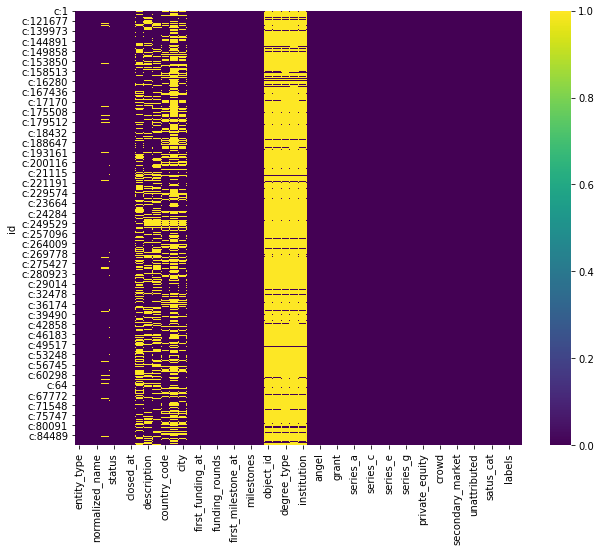

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(startupnewdf.isnull(),cmap='viridis')
    

In [62]:
#Drop features
startupcleandf=startupnewdf.drop(['entity_type','entity_id', 'normalized_name','status','founded_at','twitter_username',
                                   'description','tag_list','state_code', 'region','object_id','title','degree_type','subject',
                                   'institution','founded_year'], axis=1)

In [63]:
startupcleandf = startupcleandf[startupcleandf['city'].notna()]

In [64]:
startupcleandf.shape

(63991, 36)

In [65]:
# Finding out the percentage of null values there are in each column
df_null=(startupcleandf.isna().mean() * 100).to_frame()
df_null.style.background_gradient(cmap='Blues')

,0
category_code,3.555187
closed_at,0.000000
country_code,0.000000
city,0.000000
first_funding_at,0.000000
last_funding_at,0.000000
funding_rounds,0.000000
funding_total_usd,0.000000
first_milestone_at,0.000000
last_milestone_at,0.000000


In [66]:
startupcleandf = startupcleandf[startupcleandf['category_code'].notna()]
# Finding out the updated percentage of null values there are in each column
df_null=(startupcleandf.isna().mean() * 100).to_frame()
df_null.style.background_gradient(cmap='Blues')

,0
category_code,0.000000
closed_at,0.000000
country_code,0.000000
city,0.000000
first_funding_at,0.000000
last_funding_at,0.000000
funding_rounds,0.000000
funding_total_usd,0.000000
first_milestone_at,0.000000
last_milestone_at,0.000000


In [67]:
startupcleandf.dtypes

category_code          object
closed_at             float64
country_code           object
city                   object
first_funding_at      float64
last_funding_at       float64
funding_rounds          int64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones              int64
relationships           int64
graduated_at            int32
angel                 float64
seed                  float64
grant                 float64
crowd_equity          float64
series_a              float64
series_b              float64
series_c              float64
series_d              float64
series_e              float64
series_f              float64
series_g              float64
debt_round            float64
private_equity        float64
convertible           float64
crowd                 float64
post_ipo_equity       float64
secondary_market      float64
post_ipo_debt         float64
unattributed          float64
twitter_account         int64
satus_cat 

In [68]:
import category_encoders as ce
#labeling the category, country, and city labels
ce_ord = ce.OrdinalEncoder(cols = ['category_code', 'country_code','city'])
startupcleandf = ce_ord.fit_transform(startupcleandf)

## Feature Scaling

In [69]:
feature_scale= [feature for feature in startupcleandf.columns if feature not in ['labels']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(startupcleandf[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
startupcleandf= pd.concat([startupcleandf[['labels']].reset_index(drop=True),
                           pd.DataFrame(scaler.transform(startupcleandf[feature_scale]), columns=feature_scale)],axis=1)

In [71]:
startupcleandf.head()

,labels,category_code,closed_at,country_code,city,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,private_equity,convertible,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,satus_cat,startup_age
0,1,-1.184110,-0.113142,-0.511875,-0.606361,-0.318601,0.196046,1.987192,0.854088,0.449507,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,0.315066,-0.017594
1,0,-1.066063,-0.113142,-0.448458,-0.605821,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.190172
2,0,-0.948016,-0.113142,-0.385042,-0.605281,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.307607
3,0,-1.066063,-0.113142,-0.511875,-0.604741,-0.308374,-0.370073,-0.556974,-0.126774,-0.289064,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.302501
4,1,-1.184110,-0.113142,-0.511875,-0.604201,-0.213774,-0.281411,0.291081,-0.003395,-0.208629,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,-3.539937,-0.216723


In [72]:
#Feature correlation
startupcleandf.corr()

,labels,category_code,closed_at,country_code,city,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,private_equity,convertible,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,satus_cat,startup_age
labels,1.000000,0.028176,-0.036899,-0.107383,-0.056178,0.148571,0.252117,0.430927,0.203883,0.164842,...,0.017360,0.021359,-0.004899,0.021106,0.011977,0.014376,0.096003,-0.102395,-0.625819,0.147116
category_code,0.028176,1.000000,-0.004080,-0.010526,0.041159,0.094410,0.105144,0.099725,0.036431,0.031135,...,0.004722,0.005811,0.012036,-0.000454,0.007661,-0.002301,0.025927,-0.057700,0.025842,0.076342
closed_at,-0.036899,-0.004080,1.000000,-0.010670,0.002589,0.096057,0.099817,0.079759,0.014799,0.004245,...,-0.002387,-0.000884,-0.001558,-0.000922,-0.000521,-0.000626,0.014401,-0.090679,-0.257986,0.033257
country_code,-0.107383,-0.010526,-0.010670,1.000000,0.171821,-0.068444,-0.087855,-0.118170,-0.034904,-0.054552,...,-0.008027,-0.010830,-0.003136,-0.002350,-0.002359,-0.002549,-0.020226,0.011307,0.071156,-0.062138
city,-0.056178,0.041159,0.002589,0.171821,1.000000,0.036053,0.017395,-0.079557,-0.023037,-0.008274,...,-0.005482,-0.006607,-0.001098,-0.002301,-0.002670,-0.001588,-0.006758,-0.075046,0.036750,0.084019
first_funding_at,0.148571,0.094410,0.096057,-0.068444,0.036053,1.000000,0.965957,0.255791,0.143237,0.215300,...,0.044514,0.014194,0.015996,0.037884,0.000085,0.009122,0.144744,-0.100346,-0.047609,0.317737
last_funding_at,0.252117,0.105144,0.099817,-0.087855,0.017395,0.965957,1.000000,0.443145,0.209721,0.225424,...,0.053345,0.024042,0.018521,0.039565,0.004286,0.012120,0.186526,-0.088901,-0.063915,0.302256
funding_rounds,0.430927,0.099725,0.079759,-0.118170,-0.079557,0.255791,0.443145,1.000000,0.312972,0.055691,...,0.049161,0.055641,0.022043,0.015171,0.029238,0.012113,0.215572,0.011676,-0.110303,-0.046080
funding_total_usd,0.203883,0.036431,0.014799,-0.034904,-0.023037,0.143237,0.209721,0.312972,1.000000,0.073244,...,0.362585,0.029512,0.006629,0.599644,0.117134,0.549968,0.478385,-0.010328,-0.048672,0.039785
first_milestone_at,0.164842,0.031135,0.004245,-0.054552,-0.008274,0.215300,0.225424,0.055691,0.073244,1.000000,...,0.013515,0.005377,0.002838,0.023821,0.001858,0.006363,0.065400,0.001506,-0.084683,0.582662


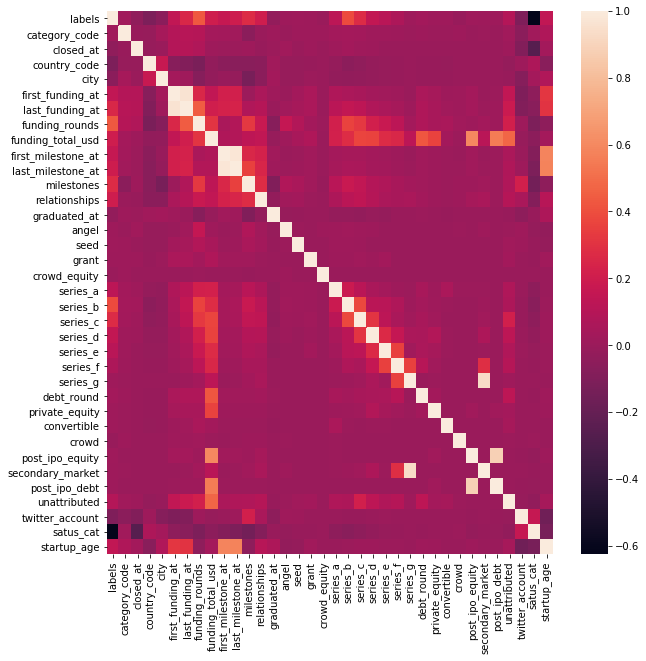

In [73]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(startupcleandf.corr())

## Feature selection

In [74]:
startupcleandf.shape

(61716, 36)

In [75]:
startupcleandf.columns

Index(['labels', 'category_code', 'closed_at', 'country_code', 'city',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'graduated_at', 'angel', 'seed', 'grant',
       'crowd_equity', 'series_a', 'series_b', 'series_c', 'series_d',
       'series_e', 'series_f', 'series_g', 'debt_round', 'private_equity',
       'convertible', 'crowd', 'post_ipo_equity', 'secondary_market',
       'post_ipo_debt', 'unattributed', 'twitter_account', 'satus_cat',
       'startup_age'],
      dtype='object')

In [76]:
#Separating the target from the data and dropping the feature status_cat as it is a slightly different version of the target feature 
y=startupcleandf['labels']
cols=['category_code', 'country_code', 'city', 'closed_at',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'graduated_at', 'angel', 'seed', 'grant',
       'crowd_equity', 'series_a', 'series_b', 'series_c', 'series_d',
       'series_e', 'series_f', 'series_g', 'debt_round', 'private_equity',
       'convertible', 'crowd', 'post_ipo_equity', 'secondary_market',
       'post_ipo_debt', 'unattributed', 'twitter_account', 
       'startup_age']
x=startupcleandf[cols]

In [77]:
x.head()

,category_code,country_code,city,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,debt_round,private_equity,convertible,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,startup_age
0,-1.184110,-0.511875,-0.606361,-0.113142,-0.318601,0.196046,1.987192,0.854088,0.449507,0.819344,...,-0.029142,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,-0.017594
1,-1.066063,-0.448458,-0.605821,-0.113142,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,-0.340389,...,-0.029142,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,-0.190172
2,-0.948016,-0.385042,-0.605281,-0.113142,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,-0.340389,...,-0.029142,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,-0.307607
3,-1.066063,-0.511875,-0.604741,-0.113142,-0.308374,-0.370073,-0.556974,-0.126774,-0.289064,-0.331971,...,-0.029142,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,-0.302501
4,-1.184110,-0.511875,-0.604201,-0.113142,-0.213774,-0.281411,0.291081,-0.003395,-0.208629,0.384795,...,-0.029142,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,-0.216723


In [78]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: labels, dtype: int64

In [79]:
# Split the dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a dictonary to store accuracy scores
scores = {}

In [80]:
x_train.shape, x_test.shape

((49372, 34), (12344, 34))

## Recursive Feature elimination (RFE)

In [226]:
#Feature scaling using RFE with number of features arbitrarily chosen to be 15
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1), n_features_to_select=15)
sel.fit(x_train,y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [227]:
#Features chosen
features=x_train.columns[sel.get_support()]
features

Index(['category_code', 'country_code', 'city', 'closed_at',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'relationships', 'series_b', 'series_c', 'series_d', 'startup_age'],
      dtype='object')

In [228]:
len(features)

15

In [229]:
def run_randomForest(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test,y_pred))

In [230]:
x_train_rfe=sel.transform(x_train)
x_test_rfe=sel.transform(x_test)

In [231]:
%%time
run_randomForest(x_train_rfe,x_test_rfe,y_train,y_test)

Accuracy:  0.9413480233311731
Wall time: 5.4 s


In [232]:
%%time
#Accuracy on the original dataset
run_randomForest(x_train,x_test,y_train,y_test)

Accuracy:  0.9449125081011017
Wall time: 6.77 s


## Feature selection by GradientBoost Tree importance

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
##Feature scaling using GradientBoost with number of features arbitrarily chosen to be 12
sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=0), n_features_to_select=12)
sel.fit(x_train,y_train)
sel.get_support()

array([False, False, False,  True, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [236]:
#Features chosen
features=x_train.columns[sel.get_support()]
features

Index(['closed_at', 'last_funding_at', 'funding_total_usd',
       'last_milestone_at', 'milestones', 'relationships', 'series_b',
       'series_c', 'series_d', 'series_e', 'twitter_account', 'startup_age'],
      dtype='object')

In [237]:
len(features)

12

In [238]:
def run_GradientBoost(x_train,x_test,y_train,y_test):
    clf=GradientBoostingClassifier(n_estimators=100,random_state=0)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test,y_pred))


In [239]:
x_train_gb=sel.transform(x_train)
x_test_gb=sel.transform(x_test)

In [240]:
%%time
run_GradientBoost(x_train_gb,x_test_gb,y_train,y_test)

Accuracy:  0.9448314970836034
Wall time: 7.14 s


In [241]:
%%time
#Accuracy on the original dataset
run_GradientBoost(x_train,x_test,y_train,y_test)

Accuracy:  0.9456416072585871
Wall time: 15.2 s


In [242]:
#Iterating over all the features
for index in range (1,35):
    sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=0), n_features_to_select=index)
    sel.fit(x_train,y_train)
    x_train_gb=sel.transform(x_train)
    x_test_gb=sel.transform(x_test)
    print('Selected Features: ', index)
    run_GradientBoost(x_train_gb,x_test_gb,y_train,y_test)
    print()

Selected Features:  1
Accuracy:  0.9250648088139987

Selected Features:  2
Accuracy:  0.9351911860012961

Selected Features:  3
Accuracy:  0.9349481529488011

Selected Features:  4
Accuracy:  0.9341380427738173

Selected Features:  5
Accuracy:  0.937297472456254

Selected Features:  6
Accuracy:  0.9385126377187297

Selected Features:  7
Accuracy:  0.9424821775761504

Selected Features:  8
Accuracy:  0.942401166558652

Selected Features:  9
Accuracy:  0.9426441996111471

Selected Features:  10
Accuracy:  0.9439403758911212

Selected Features:  11
Accuracy:  0.9452365521710953

Selected Features:  12
Accuracy:  0.9448314970836034

Selected Features:  13
Accuracy:  0.9449125081011017

Selected Features:  14
Accuracy:  0.9453175631885936

Selected Features:  15
Accuracy:  0.9454795852235904

Selected Features:  16
Accuracy:  0.9453985742060921

Selected Features:  17
Accuracy:  0.9453985742060921

Selected Features:  18
Accuracy:  0.9455605962410888

Selected Features:  19
Accuracy:  0.945

In [243]:
#Choosing the lowest number of features that give the highest accuracy to 2 significant figures
sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=0), n_features_to_select=7)
sel.fit(x_train,y_train)
x_train_gb=sel.transform(x_train)
x_test_gb=sel.transform(x_test)
print('Selected Features: ', 7)
run_GradientBoost(x_train_gb,x_test_gb,y_train,y_test)
print()

Selected Features:  7
Accuracy:  0.9424821775761504



In [244]:
#The features selected to achieve the highest accuracy with the lowest number of features
features=x_train.columns[sel.get_support()]
features

Index(['closed_at', 'funding_total_usd', 'relationships', 'series_b',
       'series_c', 'series_d', 'startup_age'],
      dtype='object')

In [81]:
cols_final = ['closed_at','funding_total_usd', 'relationships', 'series_b', 'series_c','series_d', 'startup_age']
x = startupcleandf[cols_final]

In [82]:
x.head()

,closed_at,funding_total_usd,relationships,series_b,series_c,series_d,startup_age
0,-0.113142,0.854088,1.148491,1.821605,4.305558,-0.060806,-0.017594
1,-0.113142,-0.126774,-0.117904,-0.155474,-0.109725,-0.060806,-0.190172
2,-0.113142,-0.126774,-0.286756,-0.155474,-0.109725,-0.060806,-0.307607
3,-0.113142,-0.126774,-0.117904,-0.155474,-0.109725,-0.060806,-0.302501
4,-0.113142,-0.003395,0.895212,-0.155474,-0.109725,-0.060806,-0.216723


In [83]:
# Split the dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a dictonary to store accuracy scores
scores = {}

In [84]:
x_train.shape , x_test.shape

((49372, 7), (12344, 7))

## Support Vector machine using RandomizedSearchCV for hyperparamter tuning


In [144]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(x_train, y_train)
svmscore = svm_clf.score(x_test, y_test)

print(f'The SVM achieved an accuracy of: {svmscore*100:.2f}%')

The SVM achieved an accuracy of: 93.92%


In [145]:
# Applying RandomizedSearchCV to find the best model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

parameters = [{'C': [1,10,100],'kernel': ['rbf'],'gamma': [0.3,0.5,0.7,0.9]}]

rand_search = RandomizedSearchCV(estimator = svm_clf, param_distributions = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

rand_search = rand_search.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [146]:
accuracy = rand_search.best_score_
accuracy

0.9406952100311639

In [147]:
rand_search.best_params_

{'kernel': 'rbf', 'gamma': 0.3, 'C': 100}

In [293]:
#Run with the best parameters selected
from sklearn.svm import SVC

svm_clf = SVC(C=100, kernel = 'rbf', gamma=0.3, probability =True)
svm_clf.fit(x_train, y_train)
svmscore = svm_clf.score(x_test, y_test)

scores['SVM'] = svm_clf
print(f'SVM achieved an accuracy of: {svmscore*100:.2f}%')

SVM achieved an accuracy of: 94.10%


In [303]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix of train data: ', confusion_matrix(y_true=y_train, y_pred=svm_clf.predict(x_train)))

Confusion Matrix of train data:  [[42978    16]
 [ 2794  3584]]


## Decision Tree model using RandomizedSearchCV for hyperparamter tuning

In [120]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train, y_train)
dtscore = dt_clf.score(x_test, y_test)

print(f'The Decision Tree achieved an accuracy of: {dtscore*100:.2f}%')

The Decision Tree achieved an accuracy of: 92.54%


In [121]:
# Applying RandomizedSearchCV to find the best model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

parameters = [{'criterion': ['gini','entropy'], 'ccp_alpha': [0.005,0.01,0.1], 'splitter': ['best', 'random']}]
              
rand_search = RandomizedSearchCV(estimator = dt_clf,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 10)

rand_search = rand_search.fit(x_train, y_train)

In [168]:
accuracy = rand_search.best_score_
accuracy

0.9354289934093023

In [123]:
#Best parameters
rand_search.best_params_

{'splitter': 'best', 'criterion': 'entropy', 'ccp_alpha': 0.01}

In [294]:
#Run with the best parameters selected
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier(criterion='entropy', splitter='best', ccp_alpha=0.01)
dt_clf = dt_clf.fit(x_train, y_train)
dtscore = dt_clf.score(x_test, y_test)

scores['Decision Tree'] = dt_clf
print(f'The Decision Tree achieved an accuracy of: {dtscore*100:.2f}%')

The Decision Tree achieved an accuracy of: 93.74%


In [304]:
print('Confusion Matrix of train data: ', confusion_matrix(y_true=y_train, y_pred=dt_clf.predict(x_train)))

Confusion Matrix of train data:  [[42964    30]
 [ 3098  3280]]


# Random Forest model using RandomizedSearchCV for hyperparamter tuning

In [125]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rfscore = rf_clf.score(x_test, y_test)

print(f'The Random Forest achieved an accuracy of: {rfscore*100:.2f}%')

The Random Forest achieved an accuracy of: 93.38%


In [167]:
# Applying RandomizedSearchCV to find the best model hyperparameters
from sklearn.model_selection import RandomizedSearchCV
parameters = [{'criterion': ['gini','entropy'],'n_estimators': [100,300,900], 'max_depth': [ 100, 500,1000],'ccp_alpha': [0.005,0.01,0.1], 'min_samples_split':[2,3,4]}]
rand_search = RandomizedSearchCV(estimator = rf_clf,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 10)
rand_search = rand_search.fit(x_train, y_train)

In [169]:
accuracy = rand_search.best_score_
accuracy

0.9354289934093023

In [170]:
#Best parameters
rand_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'max_depth': 500,
 'criterion': 'entropy',
 'ccp_alpha': 0.01}

In [295]:
#Run with the best parameters selected
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(criterion= 'entropy', n_estimators= 300, min_samples_split = 2, max_depth= 1000, ccp_alpha =0.001)
rf_clf.fit(x_train, y_train)
rfscore = rf_clf.score(x_test, y_test)

scores['Random Forest'] = rf_clf
print(f'The Random Forest achieved an accuracy of: {rfscore*100:.2f}%')

The Random Forest achieved an accuracy of: 94.18%


In [305]:
print('Confusion Matrix of train data: ', confusion_matrix(y_true=y_train, y_pred=rf_clf.predict(x_train)))

Confusion Matrix of train data:  [[42988     6]
 [ 2917  3461]]


# Naive Bayes model

In [296]:
# Using a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nbscore = nb_clf.score(x_test, y_test)

scores['Naive Bayes'] = nb_clf
print(f'Naive Bayes achieved an accuracy of: {nbscore*100:.2f}%')

Naive Bayes achieved an accuracy of: 93.00%


In [306]:
print('Confusion Matrix of train data: ', confusion_matrix(y_true=y_train, y_pred=nb_clf.predict(x_train)))

Confusion Matrix of train data:  [[42586   408]
 [ 3155  3223]]


# Multilayer Perceptron model using RandomizedSearchCV for hyperparamter tuning

In [143]:
# Using a MLP classifier
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(1), solver='adam', max_iter=100)
mlp_clf.fit(x_train, y_train)
mlpscore = mlp_clf.score(x_test, y_test)

print(f'The MLP achieved an accuracy of: {mlpscore*100:.2f}%')

The MLP achieved an accuracy of: 93.95%


In [132]:
# Applying RandomizedSearchCV to find the best model hyperparameters
parameters = [{'hidden_layer_sizes': [5,10, 100, 500], 'random_state':[0], 
               'activation': ['relu', 'logistic'], 'solver': ['adam', 'sgd'], 
               'learning_rate_init': [0.1, 0.01, 0.001], 
               'max_iter' :[100, 500, 1000]}]

rand_search = RandomizedSearchCV(estimator = mlp_clf,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 10)
rand_search = rand_search.fit(x_train, y_train)

In [133]:
accuracy = rand_search.best_score_
accuracy

0.9408977211692765

In [134]:
#Best parameters
rand_search.best_params_

{'solver': 'adam',
 'random_state': 0,
 'max_iter': 1000,
 'learning_rate_init': 0.001,
 'hidden_layer_sizes': 100,
 'activation': 'relu'}

In [297]:
#Run with the best parameters selected
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(activation='relu', learning_rate_init = 0.001, 
                        hidden_layer_sizes=500, solver='adam', max_iter=1000)
mlp_clf.fit(x_train, y_train)
mlpscore = mlp_clf.score(x_test, y_test)

scores['MLP'] = mlp_clf
print(f'The MLP achieved an accuracy of: {mlpscore*100:.2f}%')

The MLP achieved an accuracy of: 94.25%


In [307]:
print('Confusion Matrix of train data: ', confusion_matrix(y_true=y_train, y_pred=mlp_clf.predict(x_train)))

Confusion Matrix of train data:  [[42828   166]
 [ 2722  3656]]


# Comparison between the different classifier models

In [298]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

results = []
for name, model in scores.items():
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)

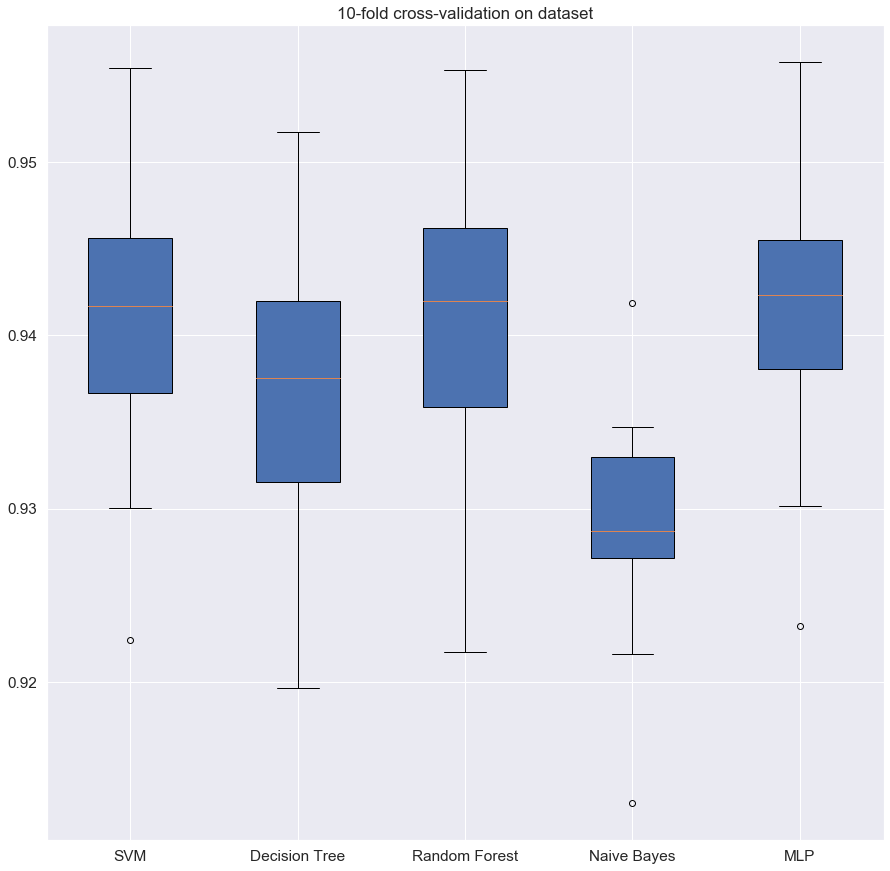

In [299]:
# Compare Algorithms
plt.figure(figsize=(15,15))
plt.boxplot(results, vert=1, patch_artist=True, labels=scores.keys())
plt.title('10-fold cross-validation on dataset')
plt.show()


SVM accuracy: 94.11% (+/- 1.76%)
SVM Classification report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10762
           1       0.97      0.56      0.71      1582

    accuracy                           0.94     12344
   macro avg       0.95      0.78      0.84     12344
weighted avg       0.94      0.94      0.93     12344

Baseline (random guess): ROC AUC=0.500
SVM: ROC AUC=0.844




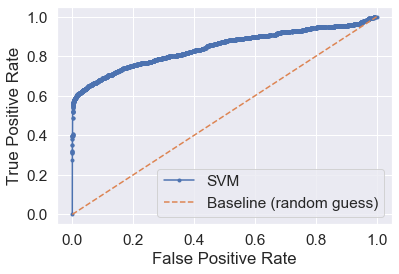


Decision Tree accuracy: 94.11% (+/- 1.76%)
Decision Tree Classification report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     10762
           1       0.99      0.52      0.68      1582

    accuracy                           0.94     12344
   macro avg       0.96      0.76      0.82     12344
weighted avg       0.94      0.94      0.93     12344

Baseline (random guess): ROC AUC=0.500
Decision Tree: ROC AUC=0.845




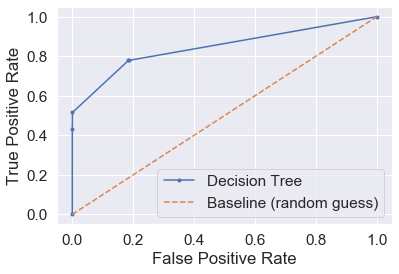


Random Forest accuracy: 94.11% (+/- 1.76%)
Random Forest Classification report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10762
           1       1.00      0.55      0.71      1582

    accuracy                           0.94     12344
   macro avg       0.97      0.77      0.84     12344
weighted avg       0.95      0.94      0.93     12344

Baseline (random guess): ROC AUC=0.500
Random Forest: ROC AUC=0.902




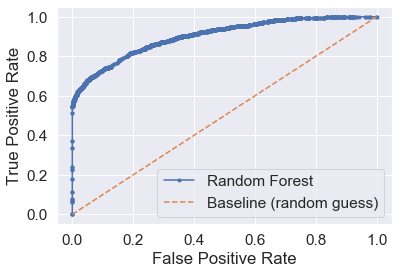


Naive Bayes accuracy: 94.11% (+/- 1.76%)
Naive Bayes Classification report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10762
           1       0.89      0.52      0.65      1582

    accuracy                           0.93     12344
   macro avg       0.91      0.75      0.81     12344
weighted avg       0.93      0.93      0.92     12344

Baseline (random guess): ROC AUC=0.500
Naive Bayes: ROC AUC=0.882




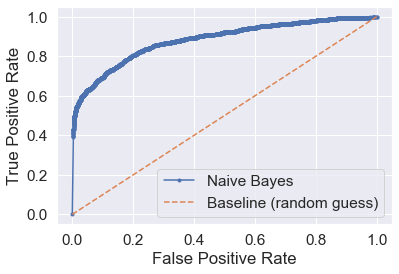


MLP accuracy: 94.11% (+/- 1.76%)
MLP Classification report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10762
           1       0.96      0.58      0.72      1582

    accuracy                           0.94     12344
   macro avg       0.95      0.79      0.84     12344
weighted avg       0.94      0.94      0.94     12344

Baseline (random guess): ROC AUC=0.500
MLP: ROC AUC=0.904




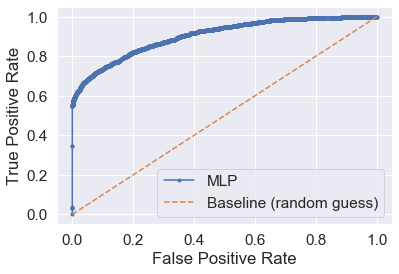

In [301]:
#Classification report
for name, model in scores.items():  
    print(f"\n{name} accuracy: {cv_results.mean()*100:0.2f}% (+/- {cv_results.std()*100*2:0.2f}%)")
    print(f'{name} Classification report:\n\n{classification_report(y_test, model.predict(x_test))}')

    #ROC Curve
    # generate a random prediction (majority class)
    r_probs = [0 for _ in range(len(y_test))]
    model_probs = model.predict_proba(x_test)[:, 1]
    #model_probs = model_probs[:, 1]
    # calculate accuracy score for random prediction model
    r_auc = roc_auc_score(y_test, r_probs)

    # calculate accuracy score different models
    model_auc = roc_auc_score(y_test, model_probs)

    # summarize scores
    print(f'Baseline (random guess): ROC AUC={r_auc:.3f}')
    print(f'{name}: ROC AUC={model_auc:.3f}\n\n')

    # calculate roc curves
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

    # plot the roc curve for the models 
    plt.plot(model_fpr, model_tpr, marker='.', label=f'{name}')

    ### TO PLOT EACH ROC CURVE INDIVIDUALLY LEAVE CODE BLOCK INSIDE LOOP
    ### TO PLOT EACH ROC CURVE ON ONE PLOT MOVE CODE BLOCK OUTSIDE LOOP
    ### START CODE BLOCK ###
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Baseline (random guess)')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend and title
    plt.legend()
    #plt.title(f'{name} ROC AUC curve')
    # show the plot
    plt.show()
    ### END CODE BLOCK ###

# K-Means Clustering

In [85]:
startupcleandf.head()

,labels,category_code,closed_at,country_code,city,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,private_equity,convertible,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,satus_cat,startup_age
0,1,-1.184110,-0.113142,-0.511875,-0.606361,-0.318601,0.196046,1.987192,0.854088,0.449507,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,0.315066,-0.017594
1,0,-1.066063,-0.113142,-0.448458,-0.605821,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.190172
2,0,-0.948016,-0.113142,-0.385042,-0.605281,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.307607
3,0,-1.066063,-0.113142,-0.511875,-0.604741,-0.308374,-0.370073,-0.556974,-0.126774,-0.289064,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.302501
4,1,-1.184110,-0.113142,-0.511875,-0.604201,-0.213774,-0.281411,0.291081,-0.003395,-0.208629,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,-3.539937,-0.216723


In [86]:
#Dropping 'labels' feature
startup_km_df=startupcleandf.drop(['labels'],axis=1)

In [87]:
startup_km_df.head()

,category_code,closed_at,country_code,city,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,private_equity,convertible,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,satus_cat,startup_age
0,-1.184110,-0.113142,-0.511875,-0.606361,-0.318601,0.196046,1.987192,0.854088,0.449507,0.819344,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,0.315066,-0.017594
1,-1.066063,-0.113142,-0.448458,-0.605821,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,-0.340389,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.190172
2,-0.948016,-0.113142,-0.385042,-0.605281,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,-0.340389,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.307607
3,-1.066063,-0.113142,-0.511875,-0.604741,-0.308374,-0.370073,-0.556974,-0.126774,-0.289064,-0.331971,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.302501
4,-1.184110,-0.113142,-0.511875,-0.604201,-0.213774,-0.281411,0.291081,-0.003395,-0.208629,0.384795,...,-0.025138,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,-3.539937,-0.216723


In [88]:
from sklearn.cluster import KMeans
# Two clusters chosen to as the problem requires the separation of startups into  two groups, successful and unsuccessful
km = KMeans(n_clusters=2)
km.fit(startup_km_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
#Resulting labels and centroids
labels_km = km.labels_
centroids = km.cluster_centers_


In [90]:
labels_km

array([0, 1, 1, ..., 0, 1, 1])

In [91]:
#Value counts of the two different clusters on the original datset
startupcleandf.labels.value_counts()


0    53756
1     7960
Name: labels, dtype: int64

In [92]:
#Crosstabulation to compare between actual labels and the cluster labels
startup_km_df_trg = startupcleandf['labels']

pd.crosstab(startup_km_df_trg,labels_km)





col_0,0,1
labels,,
0,2910,50846
1,4020,3940


In [261]:
#Finding optimal number of clusters (K)
SSE = []
index = range(1,60)
for i in index:
    km = KMeans(n_clusters=i)
    km.fit(startup_km_df)
    SSE.append(km.inertia_)
    print(i, km.inertia_)

1 2160060.0
2 2030314.8772909006
3 1903267.262021049
4 1832939.9747520129
5 1718693.6212048538
6 1659414.7512260764
7 1595923.5697105143
8 1527167.7708728327
9 1472252.5812159982
10 1421709.491954582
11 1389282.795848476
12 1330911.2475413864
13 1314106.9467061895
14 1267000.0811733776
15 1218502.8089615908
16 1167354.2138094376
17 1126198.695284004
18 1108449.6431075921
19 1070674.851022393
20 1038288.9679169893
21 1005361.500415822
22 976149.71068774
23 940341.6108421492
24 914105.1266339028
25 897883.5037565797
26 865357.0511231931
27 842643.7474489355
28 818402.9540454589
29 795261.0549071354
30 777282.2068778819
31 754083.3335882842
32 748953.7962294884
33 723398.0193166807
34 709606.912987419
35 697086.2625504753
36 687591.9173188694
37 677068.3129684043
38 675839.7960221791
39 659354.6052800907
40 644256.8988628292
41 629283.9735375888
42 626907.1501625282
43 616736.0856537363
44 606565.3065332683
45 598539.2286466205
46 590245.9332209162
47 584121.8589660622
48 566462.053453635

Text(0, 0.5, 'Sum of squared error (SSE)')

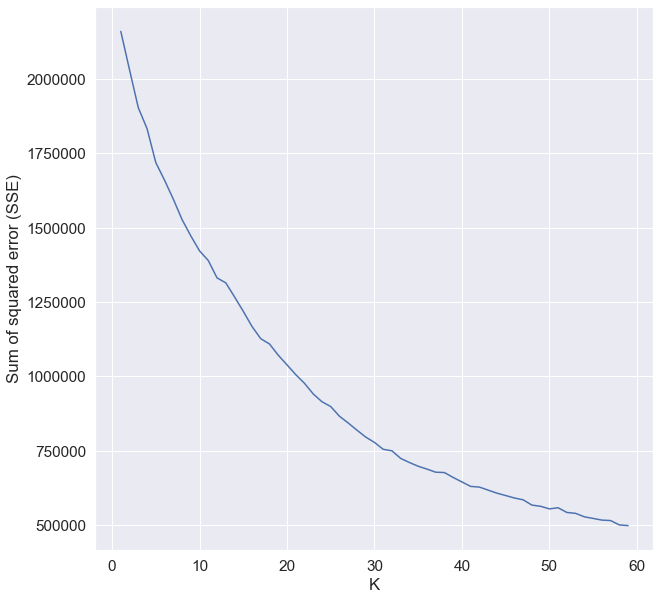

In [263]:
#Plot of K vs SSE
plt.figure(figsize=(10,10))

plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('Sum of squared error (SSE)')

In [93]:
#Number of clusters chosen to be 30
km = KMeans(n_clusters=30)
km.fit(startup_km_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
labels_k30 = km.labels_

# Adding the cluster labels as a feature in the original dataset and retraining MLP model with the new data

In [95]:
startupcleandf['labels_k30']=labels_k30

In [96]:
startupcleandf.head()

,labels,category_code,closed_at,country_code,city,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,convertible,crowd,post_ipo_equity,secondary_market,post_ipo_debt,unattributed,twitter_account,satus_cat,startup_age,labels_k30
0,1,-1.184110,-0.113142,-0.511875,-0.606361,-0.318601,0.196046,1.987192,0.854088,0.449507,...,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,0.315066,-0.017594,19
1,0,-1.066063,-0.113142,-0.448458,-0.605821,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,...,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.190172,9
2,0,-0.948016,-0.113142,-0.385042,-0.605281,-0.308374,-0.370073,-0.556974,-0.126774,-0.297861,...,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.307607,9
3,0,-1.066063,-0.113142,-0.511875,-0.604741,-0.308374,-0.370073,-0.556974,-0.126774,-0.289064,...,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,-1.613711,0.315066,-0.302501,9
4,1,-1.184110,-0.113142,-0.511875,-0.604201,-0.213774,-0.281411,0.291081,-0.003395,-0.208629,...,-0.021505,-0.013824,-0.008151,-0.004609,-0.005532,-0.095251,0.619689,-3.539937,-0.216723,1


In [97]:
startupcleandf.columns

Index(['labels', 'category_code', 'closed_at', 'country_code', 'city',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'graduated_at', 'angel', 'seed', 'grant',
       'crowd_equity', 'series_a', 'series_b', 'series_c', 'series_d',
       'series_e', 'series_f', 'series_g', 'debt_round', 'private_equity',
       'convertible', 'crowd', 'post_ipo_equity', 'secondary_market',
       'post_ipo_debt', 'unattributed', 'twitter_account', 'satus_cat',
       'startup_age', 'labels_k30'],
      dtype='object')

In [98]:
#Separating the target from the data and dropping the feature status_cat as it is a slightly different version of the target feature 
y=startupcleandf['labels']
cols=['category_code', 'country_code', 'city', 'closed_at',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'graduated_at', 'angel', 'seed', 'grant',
       'crowd_equity', 'series_a', 'series_b', 'series_c', 'series_d',
       'series_e', 'series_f', 'series_g', 'debt_round', 'private_equity',
       'convertible', 'crowd', 'post_ipo_equity', 'secondary_market',
       'post_ipo_debt', 'unattributed', 'twitter_account', 
       'startup_age', 'labels_k30']
x=startupcleandf[cols]

In [99]:
# Split the dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [100]:
x_train.shape, x_test.shape

((49372, 35), (12344, 35))

In [102]:
#MLP model trained on the updated data
from sklearn.neural_network import MLPClassifier

mlpkm_clf = MLPClassifier(activation='relu', learning_rate_init = 0.001, 
                        hidden_layer_sizes=500, solver='adam', max_iter=1000)
mlpkm_clf.fit(x_train, y_train)
mlpkm_score = mlpkm_clf.score(x_test, y_test)


print(f'The MLP achieved an accuracy of: {mlpkm_score*100:.2f}%')

The MLP achieved an accuracy of: 98.21%


In [104]:
from sklearn.metrics import classification_report

print (classification_report(y_test, mlpkm_clf.predict(x_test)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10762
           1       0.95      0.91      0.93      1582

    accuracy                           0.98     12344
   macro avg       0.97      0.95      0.96     12344
weighted avg       0.98      0.98      0.98     12344



In [106]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix of train data: ', confusion_matrix(y_true=y_train, y_pred=mlpkm_clf.predict(x_train)))

Confusion Matrix of train data:  [[42961    33]
 [  233  6145]]
